In [1]:
# Rather than importing everything manually, we'll make things easy
#   and load them all in utils.py, and just import them from there.
%matplotlib inline
import utils; reload(utils)
from utils import *

Using Theano backend.


In [2]:
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data

In [3]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

In [4]:
x = random((30,2))
x

array([[ 0.4654,  0.6927],
       [ 0.0421,  0.1169],
       [ 0.0197,  0.5635],
       [ 0.002 ,  0.5725],
       [ 0.5559,  0.2595],
       [ 0.4526,  0.0107],
       [ 0.9213,  0.47  ],
       [ 0.1152,  0.4137],
       [ 0.1401,  0.9826],
       [ 0.275 ,  0.9451],
       [ 0.8533,  0.7933],
       [ 0.8613,  0.3401],
       [ 0.8056,  0.8344],
       [ 0.0614,  0.9171],
       [ 0.5504,  0.7374],
       [ 0.1732,  0.7162],
       [ 0.9935,  0.3715],
       [ 0.3245,  0.7988],
       [ 0.8858,  0.5028],
       [ 0.5446,  0.8184],
       [ 0.0538,  0.533 ],
       [ 0.0086,  0.5832],
       [ 0.4693,  0.0014],
       [ 0.7251,  0.4735],
       [ 0.1388,  0.525 ],
       [ 0.1466,  0.5438],
       [ 0.2331,  0.9087],
       [ 0.7163,  0.8895],
       [ 0.0645,  0.3435],
       [ 0.3133,  0.8232]])

In [5]:
y = np.dot(x, [2., 3.]) + 1
y

array([ 4.0087,  1.4348,  2.7299,  2.7217,  2.8904,  1.9375,  4.2524,  2.4716,  4.228 ,  4.3853,
        5.0867,  3.743 ,  5.1145,  3.8741,  4.313 ,  3.4949,  4.1015,  4.0454,  4.2802,  4.5445,
        2.7066,  2.767 ,  1.9427,  3.8707,  2.8525,  2.9245,  4.1924,  5.1011,  2.1596,  4.0963])

In [6]:
x[:5]

array([[ 0.4654,  0.6927],
       [ 0.0421,  0.1169],
       [ 0.0197,  0.5635],
       [ 0.002 ,  0.5725],
       [ 0.5559,  0.2595]])

In [7]:
y[:5]

array([ 4.0087,  1.4348,  2.7299,  2.7217,  2.8904])

In [8]:
lm = Sequential([ Dense(1, input_shape=(2,)) ])
lm.compile(optimizer=SGD(lr=0.1), loss='mse')

In [9]:
lm.evaluate(x, y, verbose=0)

10.213527679443359

In [10]:
lm.fit(x, y, nb_epoch=5, batch_size=1)

Epoch 1/5
30/30 [==============================] - 0s - loss: 0.9256     
Epoch 2/5
30/30 [==============================] - 0s - loss: 0.1044     
Epoch 3/5
30/30 [==============================] - 0s - loss: 0.0474     
Epoch 4/5
30/30 [==============================] - 0s - loss: 0.0242     
Epoch 5/5
30/30 [==============================] - 0s - loss: 0.0128     


In [11]:
lm.evaluate(x, y, verbose=0)

0.0070556490682065487

In [12]:
lm.get_weights()

[array([[ 1.8459],
        [ 2.7478]], dtype=float32), array([ 1.2314], dtype=float32)]

In [13]:
path = "data/dogscats/sample/"
#path = "data/dogscats/"
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [15]:
batch_size=4

In [16]:
from vgg16 import Vgg16
vgg = Vgg16()
model = vgg.model

In [17]:
val_batches = get_batches(path+'valid', shuffle=False, batch_size=1)
batches = get_batches(path+'train', shuffle=False, batch_size=1)

Found 40 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [18]:
import bcolz
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname): return bcolz.open(fname)[:]

In [19]:
val_data = get_data(path+'valid')

Found 40 images belonging to 2 classes.


In [20]:
trn_data = get_data(path+'train')

Found 160 images belonging to 2 classes.


In [21]:
trn_data.shape

(160, 3, 224, 224)

In [22]:
save_array(model_path+ 'train_data.bc', trn_data)
save_array(model_path + 'valid_data.bc', val_data)

In [23]:
trn_data = load_array(model_path+'train_data.bc')
val_data = load_array(model_path+'valid_data.bc')

In [24]:
val_data.shape

(40, 3, 224, 224)

In [25]:
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [26]:
val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [27]:
trn_labels.shape

(160, 2)

In [28]:
trn_classes[:4]

array([0, 0, 0, 0], dtype=int32)

In [30]:
trn_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [31]:
trn_labels

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,

In [32]:
trn_labels[:4]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [33]:
trn_features = model.predict(trn_data, batch_size=batch_size)
val_features = model.predict(val_data, batch_size=batch_size)

In [34]:
trn_features

array([[  1.3576e-08,   2.8735e-08,   1.6805e-07, ...,   2.1495e-08,   1.1092e-06,   2.1993e-04],
       [  2.9224e-07,   1.3114e-06,   1.6619e-06, ...,   1.8501e-07,   1.5826e-04,   9.0035e-03],
       [  1.8900e-07,   6.7802e-06,   1.0637e-06, ...,   1.3926e-07,   6.2193e-04,   1.0086e-02],
       ..., 
       [  3.3839e-10,   3.3968e-09,   3.7833e-09, ...,   5.4151e-10,   1.6179e-07,   3.8777e-06],
       [  2.2362e-10,   6.4644e-10,   7.0448e-09, ...,   1.1535e-10,   4.6768e-08,   1.7886e-07],
       [  1.0779e-08,   6.2826e-11,   3.4779e-09, ...,   1.4966e-07,   3.7280e-07,   1.8806e-06]], dtype=float32)

In [35]:
val_features

array([[  3.7335e-06,   2.4638e-05,   6.3086e-05, ...,   3.2460e-06,   4.9459e-04,   7.8357e-04],
       [  8.3135e-06,   1.0233e-05,   9.6858e-06, ...,   4.1987e-06,   3.3975e-03,   7.9261e-04],
       [  8.5590e-07,   2.3345e-05,   8.2730e-06, ...,   5.7792e-07,   2.3154e-04,   4.5371e-04],
       ..., 
       [  8.6934e-07,   5.0521e-06,   6.9997e-07, ...,   1.0235e-06,   1.8748e-05,   1.0829e-03],
       [  1.2063e-06,   2.4226e-07,   2.6676e-07, ...,   8.9859e-06,   1.7760e-05,   8.9657e-04],
       [  3.2159e-07,   1.5748e-06,   1.1782e-08, ...,   7.4007e-07,   1.2170e-05,   1.8252e-05]], dtype=float32)

In [36]:
trn_features.shape

(160, 1000)

In [37]:
save_array(model_path+ 'train_lastlayer_features.bc', trn_features)
save_array(model_path + 'valid_lastlayer_features.bc', val_features)

In [38]:
trn_features = load_array(model_path+'train_lastlayer_features.bc')
val_features = load_array(model_path+'valid_lastlayer_features.bc')

In [39]:
lm = Sequential([ Dense(2, activation='softmax', input_shape=(1000,)) ])
lm.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
batch_size=4

In [41]:
lm.fit(trn_features, trn_labels, nb_epoch=3, batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 160 samples, validate on 40 samples
Epoch 1/3
160/160 [==============================] - 0s - loss: 0.2339 - acc: 0.9625 - val_loss: 0.1213 - val_acc: 0.9750
Epoch 2/3
160/160 [==============================] - 0s - loss: 0.0738 - acc: 0.9875 - val_loss: 0.0784 - val_acc: 0.9750
Epoch 3/3
160/160 [==============================] - 0s - loss: 0.0373 - acc: 0.9875 - val_loss: 0.0749 - val_acc: 0.9750


In [42]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_5 (Dense)                  (None, 2)             2002        dense_input_2[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


In [43]:
preds = lm.predict_classes(val_features, batch_size=batch_size)
probs = lm.predict_proba(val_features, batch_size=batch_size)[:,0]
probs[:8]

 4/40 [==>...........................] - ETA: 0s

array([ 0.9949,  0.9995,  0.9996,  0.9996,  0.993 ,  0.9954,  0.62  ,  0.9996], dtype=float32)

In [44]:
preds[:8]

array([0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
filenames = val_batches.filenames

In [46]:
n_view = 4

In [47]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

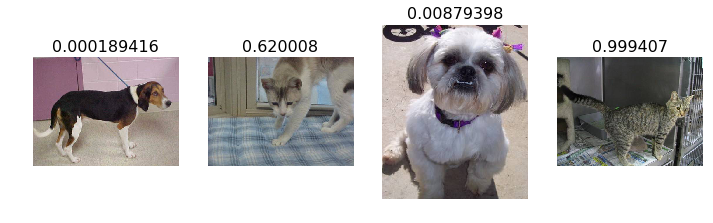

In [48]:
#1. A few correct labels at random
correct = np.where(preds==val_labels[:,1])[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

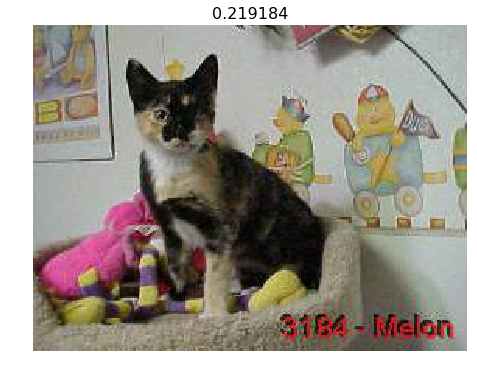

In [49]:
#2. A few incorrect labels at random
incorrect = np.where(preds!=val_labels[:,1])[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

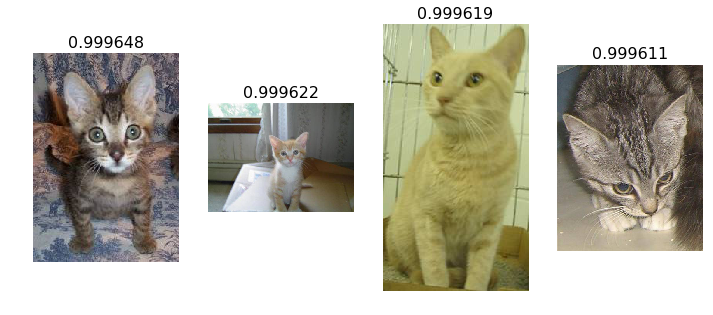

In [50]:
#3. The images we most confident were cats, and are actually cats
correct_cats = np.where((preds==0) & (preds==val_labels[:,1]))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats])

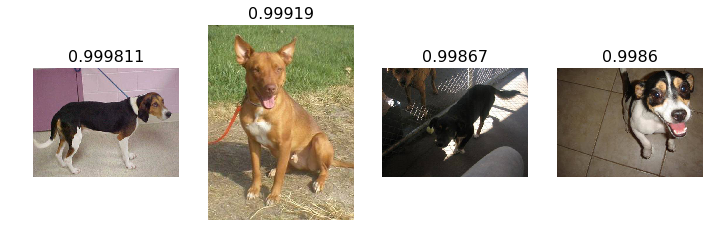

In [51]:
# as above, but dogs
correct_dogs = np.where((preds==1) & (preds==val_labels[:,1]))[0]
most_correct_dogs = np.argsort(probs[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], 1-probs[correct_dogs][most_correct_dogs])

In [52]:
#3. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((preds==0) & (preds!=val_labels[:,1]))[0]
most_incorrect_cats = np.argsort(probs[incorrect_cats])[::-1][:n_view]
plots_idx(incorrect_cats[most_incorrect_cats], probs[incorrect_cats][most_incorrect_cats])

IndexError: list index out of range

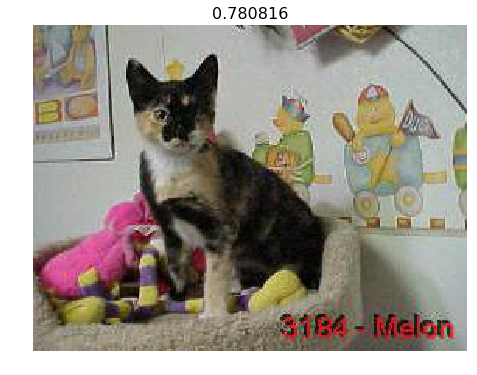

In [53]:
#3. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((preds==1) & (preds!=val_labels[:,1]))[0]
most_incorrect_dogs = np.argsort(probs[incorrect_dogs])[:n_view]
plots_idx(incorrect_dogs[most_incorrect_dogs], 1-probs[incorrect_dogs][most_incorrect_dogs])

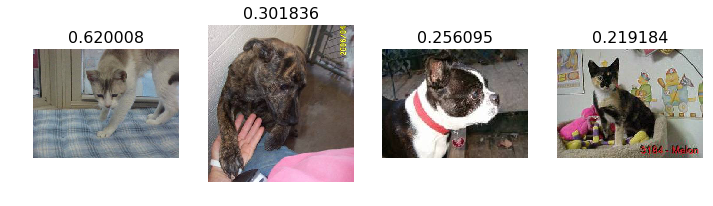

In [54]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(probs-0.5))
plots_idx(most_uncertain[:n_view], probs[most_uncertain])

In [55]:
cm = confusion_matrix(val_classes, preds)

[[19  1]
 [ 0 20]]


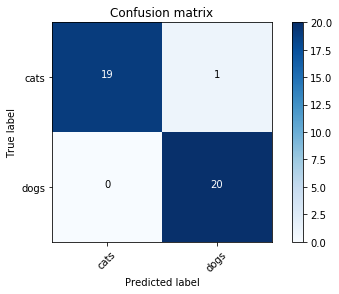

In [56]:
plot_confusion_matrix(cm, val_batches.class_indices)

In [57]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [58]:
model.pop()
for layer in model.layers:
    layer.trainable = False

In [59]:
model.add(Dense(2, activation='softmax'))

In [60]:
??vgg.finetune

In [61]:
gen=image.ImageDataGenerator()
batches = gen.flow(trn_data, trn_labels, batch_size=batch_size, shuffle=True)
val_batches = gen.flow(val_data, val_labels, batch_size=batch_size, shuffle=False)

In [74]:
def fit_model(model, batches, val_batches, nb_epoch=1):
    model.fit_generator(batches, samples_per_epoch=10, nb_epoch=nb_epoch, 
                        validation_data=val_batches, nb_val_samples=40)

In [75]:
opt = RMSprop(lr=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
fit_model(model, batches, val_batches, nb_epoch=2)

Epoch 1/2
12/10 [====================================] - 46s - loss: 2.6863 - acc: 0.8333 - val_loss: 1.6119 - val_acc: 0.9000
Epoch 2/2
12/10 [====================================] - 45s - loss: 2.6863 - acc: 0.8333 - val_loss: 1.6119 - val_acc: 0.9000


In [69]:
batches

In [77]:
model.save_weights(model_path+'finetune1.h5')

In [78]:
model.load_weights(model_path+'finetune1.h5')

In [79]:
model.evaluate(val_data, val_labels)

40/40 [==============================] - 27s    


[1.6118969202041655, 0.90000000000000002]

In [80]:
preds = model.predict_classes(val_data, batch_size=batch_size)
probs = model.predict_proba(val_data, batch_size=batch_size)[:,0]
probs[:8]

40/40 [==============================] - 34s    


array([  9.9651e-01,   1.0000e+00,   1.0000e+00,   1.0000e+00,   1.0000e+00,   1.0000e+00,
         1.2748e-17,   1.0000e+00], dtype=float32)

In [81]:
cm = confusion_matrix(val_classes, preds)

[[16  4]
 [ 0 20]]


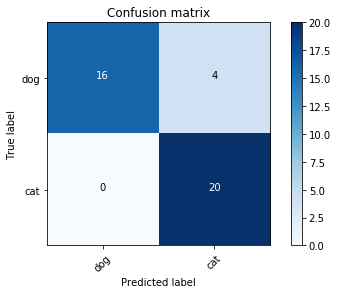

In [82]:
plot_confusion_matrix(cm, {'cat':0, 'dog':1})

In [84]:
# sympy let's us do symbolic differentiation (and much more!) in python
import sympy as sp
# we have to define our variables
x = sp.var('x')
# then we can request the derivative or any expression of that variable
pow(2*x,2).diff()

8*x

In [85]:
layers = model.layers
# Get the index of the first dense layer...
first_dense_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense][0]
# ...and set this and all subsequent layers to trainable
for layer in layers[first_dense_idx:]: layer.trainable=True

In [86]:
K.set_value(opt.lr, 0.01)
fit_model(model, batches, val_batches, 3)

Epoch 1/3
12/10 [====================================] - 40s - loss: 4.6146 - acc: 0.6667 - val_loss: 1.2167 - val_acc: 0.9250
Epoch 2/3
12/10 [====================================] - 42s - loss: 2.7806 - acc: 0.7500 - val_loss: 1.2090 - val_acc: 0.9250
Epoch 3/3
12/10 [====================================] - 44s - loss: 1.3442 - acc: 0.9167 - val_loss: 1.2089 - val_acc: 0.9250


In [87]:
model.save_weights(model_path+'finetune2.h5')